<a href="https://colab.research.google.com/github/ritikadhaker/EE307-Project-2023-G8/blob/main/FSK_Modulation_and_Demodulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

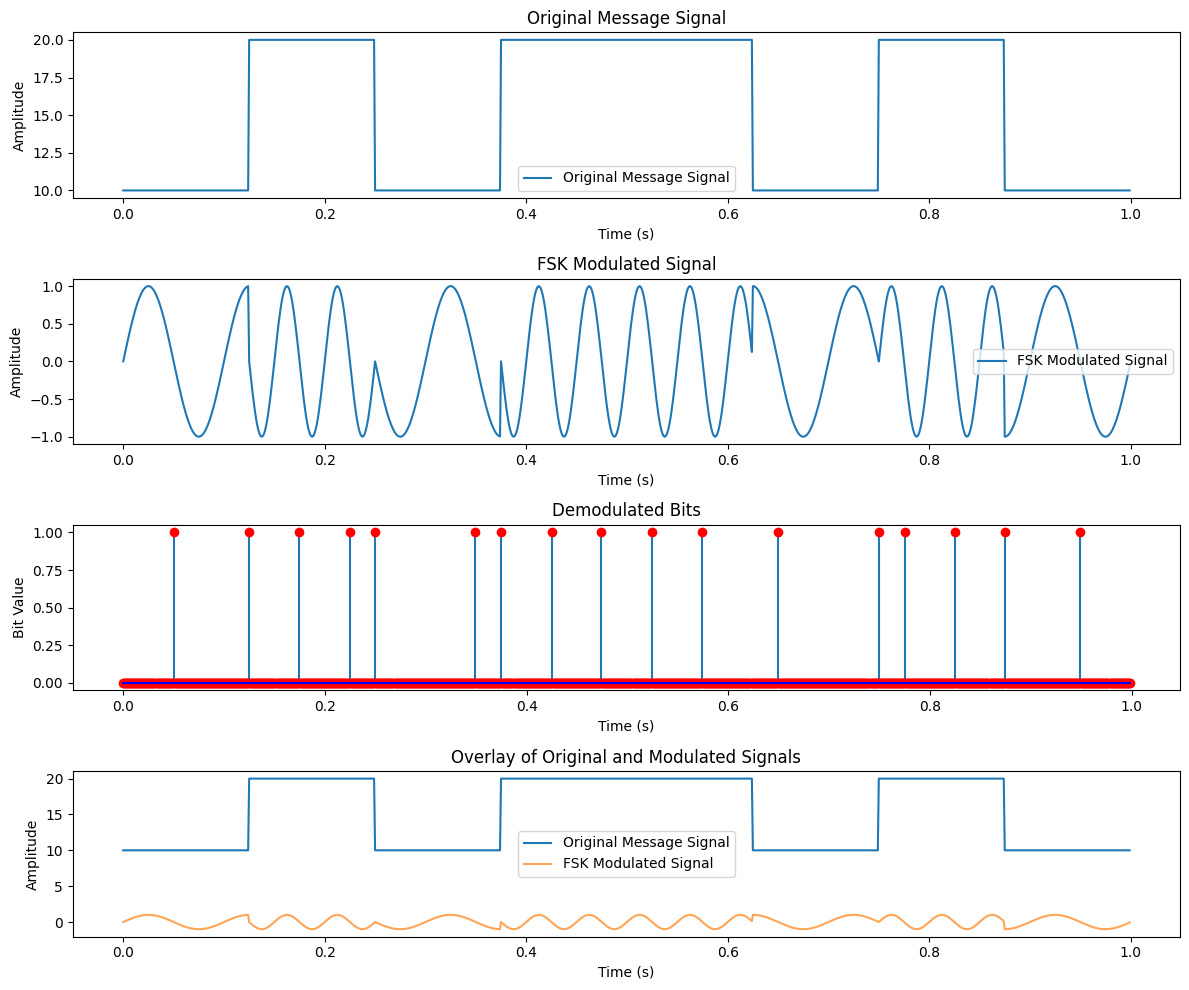

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def generate_fsk_signal(message, fs, f0, f1, duration):
    t = np.arange(0, duration, 1/fs)
    fsk_signal = np.array([f0 if bit == 0 else f1 for bit in message])
    fsk_signal_repeated = np.repeat(fsk_signal, int(fs * duration / len(message)))
    modulated_signal = np.sin(2 * np.pi * fsk_signal_repeated * t[:len(fsk_signal_repeated)])
    return t[:len(fsk_signal_repeated)], fsk_signal_repeated, modulated_signal

def fsk_demodulation(signal, fs, f0, f1):
    inst_phase = np.unwrap(np.angle(signal))
    inst_freq = np.diff(inst_phase) / (2 * np.pi) * fs
    demodulated_bits = (inst_freq > (f0 + f1) / 2).astype(int)
    return demodulated_bits

# Parameters
fs = 1000       # Sampling frequency
f0 = 10         # Frequency for '0'
f1 = 20         # Frequency for '1'
duration = 1.0  # Duration of the signal in seconds

# Generate FSK modulated signal
message = [0, 1, 0, 1, 1, 0, 1, 0]  # Binary message
t, original_signal, modulated_signal = generate_fsk_signal(message, fs, f0, f1, duration)

# FSK Demodulation
demodulated_bits = fsk_demodulation(modulated_signal, fs, f0, f1)

# Plot the results
plt.figure(figsize=(12, 10))

plt.subplot(4, 1, 1)
plt.plot(t, original_signal, label='Original Message Signal')
plt.title('Original Message Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(t, modulated_signal, label='FSK Modulated Signal')
plt.title('FSK Modulated Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(4, 1, 3)
plt.stem(t[:-1], demodulated_bits, markerfmt='ro', basefmt='b-')
plt.title('Demodulated Bits')
plt.xlabel('Time (s)')
plt.ylabel('Bit Value')

plt.subplot(4, 1, 4)
plt.plot(t, original_signal, label='Original Message Signal')
plt.plot(t, modulated_signal, label='FSK Modulated Signal', alpha=0.7)
plt.title('Overlay of Original and Modulated Signals')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()
